# EDA
Or whatever. PLaying around with some data

**Important:** The csv used for this analysis has tweet's texts truncated. <br>This issue has been solved for the next twitter retrieval season but this csv still got that problem.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import spacy

import re
import os

plt.style.use('seaborn')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Data file path
file_path = 'C:/Users/Javi/Desktop/cryptocurrency_predictor/data/twitter/tweets.csv'
cols = ['tweet_id',
        'text',
        'screen_name',
        'followers',
        'retweet_count',
        'favorite_count',
        'created_at',
        'source']

In [3]:
# First view of the df
tweets = pd.read_csv(file_path, parse_dates=['created_at'], usecols=cols)
data = tweets.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25925 entries, 0 to 25924
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        25925 non-null  object
 1   text            25925 non-null  object
 2   screen_name     25925 non-null  object
 3   followers       25925 non-null  object
 4   retweet_count   25925 non-null  object
 5   favorite_count  25925 non-null  object
 6   created_at      25925 non-null  object
 7   source          25725 non-null  object
dtypes: object(8)
memory usage: 1.6+ MB


In [4]:
def first_cleaning(df):
    """It returns a DataFrame after dropping duplicates (subset=['tweet_id']) and sorting it (by='tweet_id')
    
    Parameters
    ----------
    df : Pandas DataFrame to clean
    """
    df_no_dup = df.drop_duplicates(subset=['tweet_id'], ignore_index=True)
    cleaned_df = df_no_dup.sort_values(by='tweet_id', ignore_index=True)
    return cleaned_df


def re_cleaning_round(text):
    """It returns a string without hashtags, new line characters, @ mentions and urls."""
    text = re.sub('#', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('@\\w+ *', '', text)
    text = re.sub('https?://\S*', '', text)
    
    return text

re_cleaning = lambda x: re_cleaning_round(x)


def rt_counter(df):
    """It returns how many retweets (RT) are in the column 'text' of a given DataFrame."""
    pattern = '^RT :.*'
    count = 0
    
    for text in df['text']:
        if re.match(pattern, text):
            count +=1
    return count


def rt_dropper(df):
    """It returns a NEW DataFrame with no retweets in it. It does not modify the one passed to it."""
    pattern = '^RT :.*'
    rows = []
    
    for i, text in enumerate(df['text']):
        if re.match(pattern, text):
            rows.append(i)
    return df.drop(rows, )

In [5]:
data = first_cleaning(data)
data.shape

(25923, 8)

In [6]:
data[data['tweet_id'] == 'tweet_id']

,tweet_id,text,screen_name,followers,retweet_count,favorite_count,created_at,source
25922,tweet_id,text,screen_name,followers,retweet_count,favorite_count,created_at,source


In [7]:
data = data.drop([25922]).reset_index(drop=True)

In [8]:
data['created_at'] = pd.to_datetime(data['created_at'])

In [9]:
data['text'] = data['text'].apply(re_cleaning_round)

In [10]:
print(data.shape)
data.head()

(25922, 8)


,tweet_id,text,screen_name,followers,retweet_count,favorite_count,created_at,source
0,1358854507405467651,RT : LATOKEN Bitcoin Giveaway 💰5 lucky winners...,Damian53793910,29,2329,0,2021-02-08 19:05:35,Twitter for Android
1,1358854509888438273,Btc drops 2% &amp; he's tweeetin up a storm. ...,Bomock1,930,0,0,2021-02-08 19:05:36,Twitter for Android
2,1358854510345650182,RT : on the 02/08/2021 at 07:02 1BTC was worth...,fintechpro_org,196,1,0,2021-02-08 19:05:36,NaN
3,1358854511033524224,I get your point. Doge will never be as valuab...,traxxonwaxx99,241,0,0,2021-02-08 19:05:36,Twitter for iPhone
4,1358854511213879300,"RT : Welcome to bitcoin, Elon.""In retrospect, ...",1realmutumina,351,13,0,2021-02-08 19:05:36,Twitter for iPhone


In [11]:
df_no_rt = rt_dropper(data)
df_no_rt.head(3)

,tweet_id,text,screen_name,followers,retweet_count,favorite_count,created_at,source
1,1358854509888438273,Btc drops 2% &amp; he's tweeetin up a storm. ...,Bomock1,930,0,0,2021-02-08 19:05:36,Twitter for Android
3,1358854511033524224,I get your point. Doge will never be as valuab...,traxxonwaxx99,241,0,0,2021-02-08 19:05:36,Twitter for iPhone
7,1358854514346917888,In 2014 offered a deal where they’d give you $...,BonJarber,1243,0,0,2021-02-08 19:05:37,Twitter for iPhone


**Retweets vs no retweets**

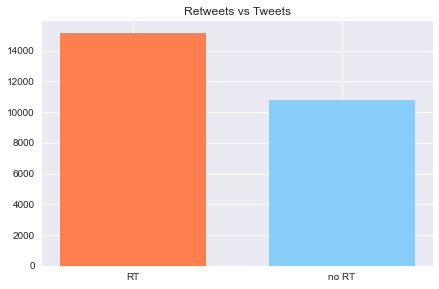

In [12]:
freq = rt_counter(data), len(data) - rt_counter(data)
classes = ('RT', 'no RT')

plt.figure(figsize=(7, 4.5))
plt.bar(classes, freq, width=0.7, color=['coral','lightskyblue'])
plt.title('Retweets vs Tweets');

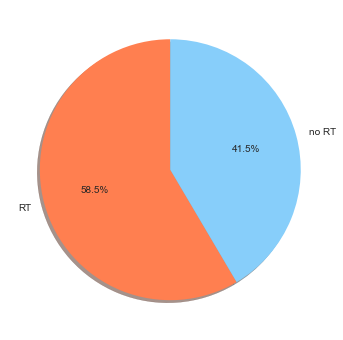

In [13]:
labels = ['RT', 'no RT']
sizes = rt_counter(data), len(data) - rt_counter(data)

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90, colors=['coral','lightskyblue']);

**Tweet source** Where people is posting bitcoin tweets from

In [14]:
sources = len(data['source'].value_counts())
print(f'Bitcoin related tweets were posted from {sources} different sources. Most of them are bots')

Bitcoin related tweets were posted from 287 different sources. Most of them are bots


In [15]:
# Main sources where people post tweets from
def tweet_sources(df, n_sources=5):
    """It returns a dictionary with the main sources used by people to post bitcoin related tweets as keys, and their counts as values.
    
    Parameters
    ----------
    df : DataFrame that contains a column named "source".
    n_sources : Length of the returned dictionary
    """
    sources = df['source'].value_counts().index
    counts = df['source'].value_counts().values

    main_sources = {}
    counter = 0

    for source, count in zip(sources, counts):
        counter += 1
        if counter <= n_sources:
            main_sources[source] = count
        else:
            break

    return main_sources

In [16]:
main_sources = tweet_sources(data, 5)
main_sources

{'Twitter for iPhone': 10056,
 'Twitter for Android': 7202,
 'Twitter Web App': 6860,
 'Twitter for iPad': 280,
 'TweetDeck': 153}

Text(0, 0.5, 'Source')

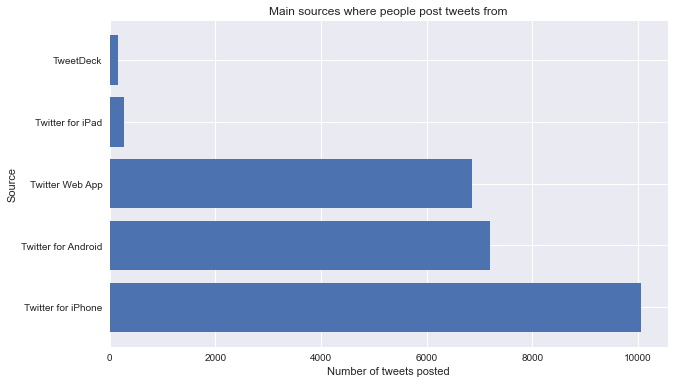

In [17]:
plt.figure(figsize=(10, 6))
plt.barh(list(main_sources.keys()), list(main_sources.values()))

plt.title('Main sources where people post tweets from')
plt.xlabel('Number of tweets posted')
plt.ylabel('Source')

**Number of individuals who posted about bitcoin** and how many times each one of those

In [18]:
len(data['screen_name']), data['screen_name'].nunique()

(25922, 19643)

In [19]:
one_tweet_people = (data['screen_name'].value_counts() == 1).sum()
print(f'{one_tweet_people} people posted bitcoin related tweets just once.')

16560 people posted bitcoin related tweets just once.


In [20]:
# How many times users posted a tweet in the period of study
unique_users = data['screen_name'].value_counts().value_counts().sort_values(ascending=False)
unique_users = unique_users.to_frame().reset_index()
unique_users.columns = ['tweets', 'users']
unique_users.head()

,tweets,users
0,1,16560
1,2,2013
2,3,537
3,4,219
4,5,120


In [21]:
np.arange(0, 15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

Text(0, 0.5, 'Number of people')

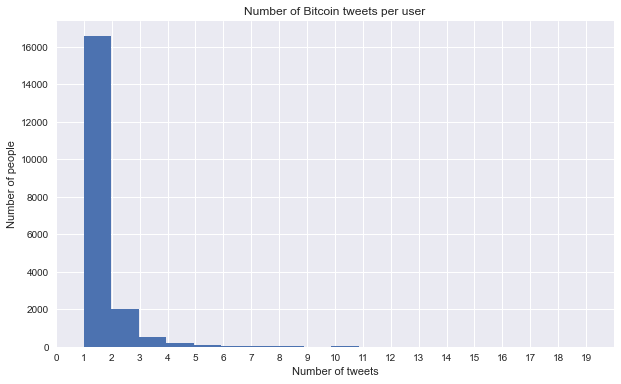

In [22]:
plt.figure(figsize=(10, 6))

plt.hist(data['screen_name'].value_counts().values, bins=70);
plt.xlim(0, 20)
plt.xticks(np.arange(0, 20))

plt.title('Number of Bitcoin tweets per user')
plt.xlabel('Number of tweets')
plt.ylabel('Number of people')

Text(0, 0.5, 'Number of people')

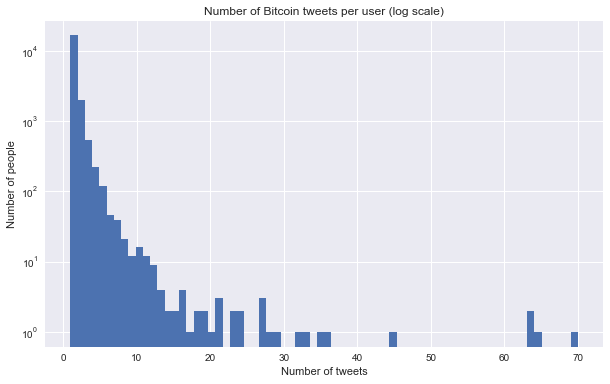

In [23]:
plt.figure(figsize=(10, 6))

plt.hist(data['screen_name'].value_counts().values, bins=70);
plt.yscale('log')

plt.title('Number of Bitcoin tweets per user (log scale)')
plt.xlabel('Number of tweets')
plt.ylabel('Number of people')

### Sentiment analysis: Polarity Scores

**A little testing**

In [24]:
import nltk
# nltk.download('punkt')

In [25]:
sentence = 'A long time ago in a galaxy far, far away…'
tokens = nltk.word_tokenize(sentence)
tokens

['A', 'long', 'time', 'ago', 'in', 'a', 'galaxy', 'far', ',', 'far', 'away…']

**Testing Polarity Scores with VADER & TextBlob**

In [26]:
# If you haven't, download the vader lexicon
# nltk.download('vader_lexicon')

In [92]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
analyzer.polarity_scores('You better run away you piece of crap')

{'neg': 0.226, 'neu': 0.522, 'pos': 0.252, 'compound': 0.0772}

In [93]:
from textblob import TextBlob

opinion = TextBlob('You better run away you piece of crap')
opinion.sentiment

Sentiment(polarity=-0.15000000000000002, subjectivity=0.65)

In [94]:
# Examples
ex1 = data['text'][np.random.randint(0, data.shape[0])]
ex2 = data['text'][np.random.randint(0, data.shape[0])]
ex3 = data['text'][np.random.randint(0, data.shape[0])]

print(ex1)
print('*' * 50)
print(ex2)
print('*' * 50)
print(ex3)

So close to 50k usd per Bitcoin Buy and hold and you will see great profits in the future. And no you don’t need 50k to buy BTC 🤦‍♂️ you can start with any amount. Also if you’ve purchased dogecoin convert that aswell before you see doge crash in the next week.-Crypto elon
**************************************************
RT : I think a lot of people are underestimating the power that a mature derivatives market is going to bring to Bitcoin durin…
**************************************************
Bitcoin is up over $7,500 in the last 24 hours, reaching $46,300 on 


In [95]:
# Testing VADER polarity
examples = [ex1, ex2, ex3]
for ex in examples:
    print(analyzer.polarity_scores(ex)['compound'])
    print('*' * 10)

0.4767
**********
0.4215
**********
0.2023
**********


In [96]:
# Testing TextBlob polarity
for ex in examples:
    opinion = TextBlob(ex)
    print(opinion.sentiment[0])
    print('*' * 10)

0.26666666666666666
**********
0.1
**********
0.0
**********


**Adding polarity scores to our DataFrame**

In [68]:
def vader_polarity(text):
    return analyzer.polarity_scores(text)['compound']

get_v_polarity = lambda x: vader_polarity(x)


def textblob_polarity(text):
    return TextBlob(text).sentiment[0]

get_tb_polarity = lambda x: textblob_polarity(x)

In [69]:
data['vader_polarity'] = data['text'].apply(get_v_polarity)
data['textblob_polarity'] = data['text'].apply(get_tb_polarity)

In [99]:
data.loc[:, ['text', 'vader_polarity', 'textblob_polarity', 'followers']].sample(5)

,text,vader_polarity,textblob_polarity,followers
25625,"If he bothers to read the Bitcoin whitepaper, ...",-0.2023,0.120000,77
2634,How many Peter Schiffs does it take to screw i...,-0.1759,0.171875,98
8050,RT : Tesla says it has invested about $1.5 bil...,0.3818,0.000000,38
16774,RT : Literally just buy bitcoin and hold it. I...,0.0000,0.100000,1
20910,RT : Bitcoin is ambitious - not gonna let me s...,0.4767,0.250000,168


In [100]:
data['text'][2634]

'How many Peter Schiffs does it take to screw in a lightbulb?  Answer: “100. It takes 99 to sit and say the lightbulb will never work, and the other one to flip the switch on and off before the bulb is in the socket!” Bitcoin '